# Setting up the environment.

Importing Pandas, Matplotlib, Numpy, and Datetime packages (make sure to have these installed before executing).

In [2]:
#Pandas for data frames and data manipulation
import pandas as pd
#datetime to check data availability
import datetime
#plotting functions
import matplotlib.pyplot as plt
#numpy for unique function for data analysis
import numpy as np

#this line is necessary for iPython notebook
%matplotlib inline

Now we can read the precipitation data into a dataframe using Pandas. Make sure you have downloaded the file '167_TIPBUCK_CPEAK_1993-2014.txt' and that the pathname is correct before executing. We have placed ours in the local directory 'precipitation.' For the illustration in this notebook, we only look at the CPEAK data; however, there are 3 other data sets available; you can find more information on how to clean these other files in the provided Python script.

In [33]:
ext='precipitation/'
cpeak = pd.read_csv(ext+'167_TIPBUCK_CPEAK_1993-2014.txt') #184414 data points

# Exploring and organizing the data.

Let's look at the way the data is formatted:

In [4]:
cpeak.head()

,site_id,date,hour,measurement,value,unit,flag
0,CPEAK,1993-09-21,1400,Tipping Rain Bucket,12.9,mm,G
1,CPEAK,1993-09-21,1500,Tipping Rain Bucket,15.3,mm,G
2,CPEAK,1993-09-21,1600,Tipping Rain Bucket,13.6,mm,G
3,CPEAK,1993-09-21,1700,Tipping Rain Bucket,14.3,mm,G
4,CPEAK,1993-09-21,1800,Tipping Rain Bucket,13.7,mm,G


We see that there are 6 columns, the site_id, the date and hour of measurement, the measurement method, the value and unit of the measurement, and a flag to indicate whether the data is good (G). Let's look at each column closer. First, is all data from the CPEAK site? Are all measurements made using the same technique? Is all the data Good? Is all data in the same units.

In [11]:
np.unique(cpeak['site_id'])

array(['CPEAK'], dtype=object)

In [12]:
np.unique(cpeak['measurement'])

array(['Tipping Rain Bucket'], dtype=object)

In [7]:
np.unique(cpeak['flag'])

array(['G', 'M'], dtype=object)

In [8]:
np.unique(cpeak['unit'])

array(['mm'], dtype=object)

Everything looks in order except for some data which seems to be missing. Let's remove it.

In [15]:
len(cpeak[cpeak['flag']=='M'])

91669

In [34]:
cpeak = cpeak[cpeak['flag']=='G']
np.unique(cpeak['flag'])

array(['G'], dtype=object)

It is also instructive to look at the histogram of the data.

(array([   210.,    386.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  92149.]),
 array([-9999. , -8899.2, -7799.4, -6699.6, -5599.8, -4500. , -3400.2,
        -2300.4, -1200.6,  -100.8,   999. ]),
 <a list of 10 Patch objects>)

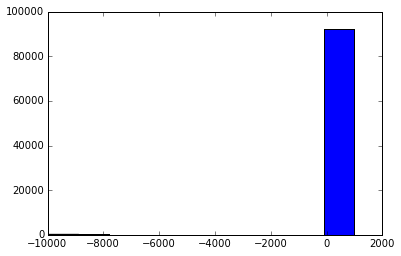

In [18]:
plt.hist(cpeak['value'])

Note that there are several values that are not correct. Specifically, there are several values that are very negative. Additionally, if we look at the upper bound of the array

In [19]:
max(cpeak['value'])

999.0

we notice that some values are unlikely high as well. Showing a histogram for non-negative values gives:

(array([  9.21480000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   0. ,   99.9,  199.8,  299.7,  399.6,  499.5,  599.4,  699.3,
         799.2,  899.1,  999. ]),
 <a list of 10 Patch objects>)

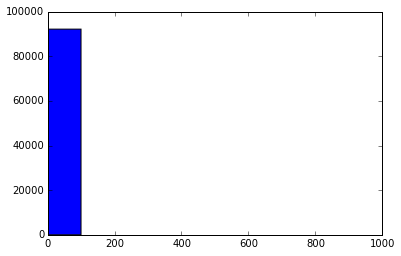

In [20]:
plt.hist(cpeak.loc[cpeak['value']>=0,'value'])

There is indeed one value that is an outlier. We filter out all of the outliers.

In [35]:
cpeak=cpeak[(cpeak['value']>=0)|(cpeak['value']<100)]

We also convert the time to a numeric value (in seconds) that makes it easier to sort and numerically analyse the data.

In [36]:
cpeak['time-seconds']=cpeak['date'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d')-\
    datetime.datetime(1970,1,1)).total_seconds())+cpeak['hour']*36

For the simulation, it is also important to have the time steps since precipitation is measured in units per time. This is an example of how one could calculate the time step for every data point.

In [24]:
cpeak.index=cpeak['time-seconds']
a=cpeak.head(len(cpeak)-1)['time-seconds']
b=cpeak.tail(len(cpeak)-1)['time-seconds']
a.index=range(len(a))
b.index=range(len(a))
delta_t=b-a

(array([  9.27270000e+04,   2.00000000e+00,   1.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   1.36210000e+03,   2.72320000e+03,
          4.08430000e+03,   5.44540000e+03,   6.80650000e+03,
          8.16760000e+03,   9.52870000e+03,   1.08898000e+04,
          1.22509000e+04,   1.36120000e+04]),
 <a list of 10 Patch objects>)

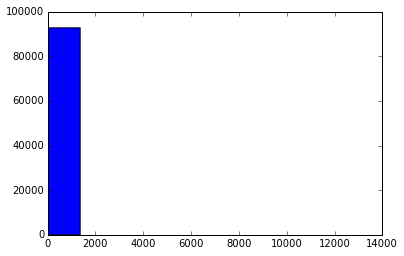

In [27]:
plt.hist(delta_t/3600)

There are a few instances in which (valid) data is collected at time intervals greater than an hour; we should try to avoid these events.

# Extracting and looking at a piece of the data.

We would like to extract a slice of the data for a particular period of time to investigate a single event:

In [37]:
time_min=(datetime.datetime.strptime('2008/07/28  16:00:00',\
    '%Y/%m/%d %H:%M:%S')-datetime.datetime(1970,1,1)).total_seconds()
time_max=(datetime.datetime.strptime('2008/07/30  18:00:00',\
    '%Y/%m/%d %H:%M:%S')-datetime.datetime(1970,1,1)).total_seconds()
cpeak_slice=cpeak[(cpeak['time-seconds']>=time_min)&(cpeak['time-seconds']<=time_max)]

Now, let's plot the data so we can see the precipitation event we are investigating.

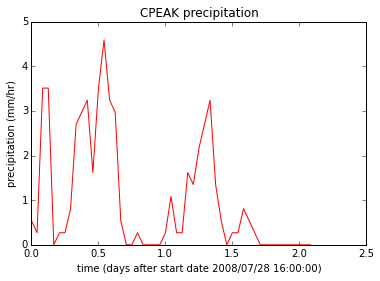

In [38]:
def plot_precip_data(precip,time_ref,location='CPEAK'):
    # Simple plot to check the data
    plt.plot(precip['time-seconds']/3600/24-time_ref/3600/24,\
        precip['value'], 'r-')
    plt.xlabel('time (days after start date 2008/07/28 16:00:00)')
    plt.ylabel('precipitation (mm/hr)')
    plt.title(location+' precipitation')
    plt.show()
    
plot_precip_data(cpeak_slice,time_min)

We note that there are three precipitation sub-events, occuring in quick succession. We look at the preceeding days to see whether the water saturation of the soil has had time to stabilize from previous precipitation events so that we may use the Green-Ampt formula for modeling infiltration. We note that there is some precipitation in the previous days, but they are small.

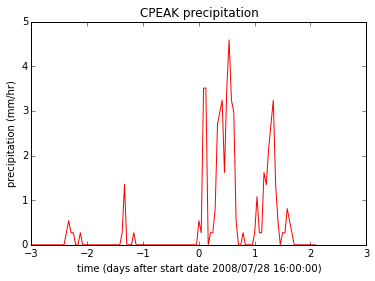

In [39]:
time_start=(datetime.datetime.strptime('2008/07/25  16:00:00',\
    '%Y/%m/%d %H:%M:%S')-datetime.datetime(1970,1,1)).total_seconds()
cpeak_slice=cpeak[(cpeak['time-seconds']>=time_start)&(cpeak['time-seconds']<=time_max)]
plot_precip_data(cpeak_slice,time_min)